# Combined Oracle Bandits

Analyze the performance of various oracle bandits that solve the combined activity and matching task

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import json 
import argparse 
import sys
from openrl.envs.common import make
from gymnasium.envs.registration import register

In [39]:
from rmab.simulator import RMABSimulator
from rmab.baselines import optimal_whittle,  optimal_q_iteration, optimal_whittle_sufficient, greedy_policy, random_policy, greedy_iterative_policy
from rmab.fr_dynamics import get_all_transitions
from rmab.utils import get_save_path, delete_duplicate_results, filter_pareto_optimal, is_pareto_optimal


In [4]:
is_jupyter = 'ipykernel' in sys.modules

In [5]:
if is_jupyter: 
    seed        = 42
    n_arms      = 4
    budget      = 3 
    discount    = 0.9
    alpha       = 3 
    n_episodes  = 30
    episode_len = 20 
    n_epochs    = 10
    save_name = 'combined_arms_{}'.format(n_arms)
    match_prob = 0.5
    save_with_date = False 
else:
    parser = argparse.ArgumentParser()
    parser.add_argument('--n_arms',         '-N', help='num beneficiaries (arms)', type=int, default=8)
    parser.add_argument('--episode_len',    '-H', help='episode length', type=int, default=20)
    parser.add_argument('--n_episodes',     '-T', help='num episodes', type=int, default=30)
    parser.add_argument('--budget',         '-B', help='budget', type=int, default=3)
    parser.add_argument('--n_epochs',       '-E', help='number of epochs (num_repeats)', type=int, default=10)
    parser.add_argument('--discount',       '-d', help='discount factor', type=float, default=0.9)
    parser.add_argument('--alpha',          '-a', help='alpha: for conf radius', type=float, default=3)
    parser.add_argument('--seed',           '-s', help='random seed', type=int, default=42)
    parser.add_argument('--save_name',      '-n', help='save name', type=str, default='combined_lamb')
    parser.add_argument('--match_prob',      '-m', help='match probability', type=float, default=0.5)
    parser.add_argument('--use_date', action='store_true')

    args = parser.parse_args()

    n_arms      = args.n_arms
    budget      = args.budget
    discount    = args.discount
    alpha       = args.alpha 
    seed        = args.seed
    n_episodes  = args.n_episodes
    episode_len = args.episode_len
    n_epochs    = args.n_epochs
    save_name   = args.save_name 
    save_with_date = args.use_date 
    match_prob = args.match_prob 



In [6]:
n_states = 2
n_actions = 2

In [7]:
all_population_size = 100 # number of random arms to generate
all_transitions = get_all_transitions(all_population_size)

In [8]:
all_transitions.shape

(100, 2, 2, 2)

In [9]:
all_features = np.arange(all_population_size)

## Homogenous Match Probability

In [10]:
np.random.seed(seed)
random.seed(seed)
simulator = RMABSimulator(all_population_size, all_features, all_transitions,
            n_arms, episode_len, n_epochs, n_episodes, budget, number_states=n_states, reward_style='match',match_probability=match_prob)

acting should always be good! 0.000 < 0.044
acting should always be good! 0.000 < 0.162
acting should always be good! 0.108 < 0.183
good start state should always be good! 0.380 < 0.508
good start state should always be good! 0.506 < 0.760
cohort [83 53 70 45]
cohort [41 39 15 76]
cohort [79 72 62 94]
cohort [92 64 85 36]
cohort [ 7 38 78  2]
cohort [12 59 91 73]
cohort [48 64  7 37]
cohort [18 53 12 32]
cohort [69 64 53 61]
cohort [46 87 15 26]


In [11]:
import logging
logging.disable(logging.CRITICAL)

In [12]:
if is_jupyter:
    lamb = 1
    np.random.seed(seed)
    random.seed(seed)
    joint_combined_reward = optimal_q_iteration(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    joint_combined_active_rate = simulator.total_active/(joint_combined_reward.size*n_arms)
    print(np.mean(joint_combined_reward) + lamb*n_arms*joint_combined_active_rate)

first state [0 1 1 1]
instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instanc

In [13]:
if is_jupyter:
    lamb = 1 

    np.random.seed(seed)
    random.seed(seed)
    sufficient_reward = optimal_whittle_sufficient(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    sufficient_active_rate = simulator.total_active/(sufficient_reward.size*n_arms)
    print(np.mean(sufficient_reward)+lamb*n_arms*sufficient_active_rate)
    print(np.mean(sufficient_reward),sufficient_active_rate)

first state [0 1 1 1]
instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instanc

In [14]:
if is_jupyter:
    np.random.seed(seed)
    random.seed(seed)
    approximate_combined_reward = optimal_whittle(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    approximate_combined_active_rate = simulator.total_active/(approximate_combined_reward.size*n_arms)
    print(np.mean(approximate_combined_reward) + lamb*n_arms*approximate_combined_active_rate)

first state [0 1 1 1]
   state [0 1 1 1] state_WI [0.71 1.49 1.51 1.35] sorted [2 1 3]


   state [0 1 1 1] state_WI [0.71 1.49 1.51 1.35] sorted [2 1 3]
   state [0 1 1 1] state_WI [0.71 1.49 1.51 1.35] sorted [2 1 3]
   state [0 1 1 1] state_WI [0.71 1.49 1.51 1.35] sorted [2 1 3]
   state [1 1 1 1] state_WI [1.29 1.49 1.51 1.35] sorted [2 1 3]
   state [1 1 1 0] state_WI [1.29 1.49 1.51 1.05] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.29 1.49 1.51 1.05] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.29 1.49 1.51 1.05] sorted [2 1 0]
   state [1 1 0 0] state_WI [1.29 1.49 1.08 1.05] sorted [1 0 2]
   state [1 1 1 0] state_WI [1.29 1.49 1.51 1.05] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.29 1.49 1.51 1.05] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.29 1.49 1.51 1.05] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.29 1.49 1.51 1.05] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.29 1.49 1.51 1.05] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.29 1.49 1.51 1.05] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.29 1.49 1.51 1.05] sorted [2 1 0]
   state [1 0 1 0] state_

In [22]:
lamb_list = [0,1,2,4,6,8,12,16,24,32,48,64] 
lamb_list = [i/n_arms for i in lamb_list]


In [17]:
approximate_match = []
approximate_active = []

sufficient_match = []
sufficient_active = []

In [23]:
for lamb in lamb_list:
    np.random.seed(seed)
    random.seed(seed)
    approximate_combined_reward = optimal_whittle(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    approximate_combined_active_rate = simulator.total_active/(approximate_combined_reward.size*n_arms)

    approximate_match.append(np.mean(approximate_combined_reward))
    approximate_active.append(approximate_combined_active_rate)

first state [0 1 1 1]
   state [0 1 1 1] state_WI [0.35 1.   1.   1.  ] sorted [2 1 3]
   state [0 1 1 1] state_WI [0.35 1.   1.   1.  ] sorted [2 1 3]
   state [0 1 1 1] state_WI [0.35 1.   1.   1.  ] sorted [2 1 3]
   state [0 1 1 1] state_WI [0.35 1.   1.   1.  ] sorted [2 1 3]
   state [1 1 1 1] state_WI [1. 1. 1. 1.] sorted [2 1 3]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 0 0] state_WI [1.   1.   0.54 0.52] sorted [1 0 2]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1 1 1 0] state_WI [1.   1.   1.   0.52] sorted [2 1 0]
   state [1

In [24]:
for lamb in lamb_list:
    np.random.seed(seed)
    random.seed(seed)
    sufficient_reward = optimal_whittle_sufficient(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    sufficient_active_rate = simulator.total_active/(sufficient_reward.size*n_arms)

    sufficient_match.append(np.mean(sufficient_reward))
    sufficient_active.append(sufficient_active_rate)

first state [0 1 1 1]


instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instance 0, ep 29, state [1 1

## Heterogenous Match Probability

In [61]:
np.random.seed(seed)
match_probabilities = [np.random.random() for i in range(all_population_size)]
simulator.match_probability_list = match_probabilities 

In [55]:
if is_jupyter:
    lamb = 1
    np.random.seed(seed)
    random.seed(seed)
    random_reward = random_policy(simulator, n_episodes, n_epochs)
    random_active_rate = simulator.total_active/(random_reward.size*n_arms)
    print(np.mean(random_reward) + lamb*n_arms*random_active_rate)

first state [0 1 1 1]
instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instanc

In [56]:
if is_jupyter:
    lamb = 1
    np.random.seed(seed)
    random.seed(seed)
    greedy_reward = greedy_policy(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    greedy_active_rate = simulator.total_active/(greedy_reward.size*n_arms)
    print(np.mean(greedy_reward) + lamb*n_arms*greedy_active_rate)

first state [0 1 1 1]
instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instanc

In [ ]:
if is_jupyter:
    lamb = 1
    np.random.seed(seed)
    random.seed(seed)
    greedy_iterative_reward = greedy_iterative_policy(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    greedy_iterative_active_rate = simulator.total_active/(greedy_iterative_reward.size*n_arms)
    print(np.mean(greedy_iterative_reward) + lamb*n_arms*greedy_active_rate)

In [64]:
if is_jupyter:
    np.random.seed(seed)
    random.seed(seed)
    approximate_combined_reward = optimal_whittle(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    approximate_combined_active_rate = simulator.total_active/(approximate_combined_reward.size*n_arms)
    print(np.mean(approximate_combined_reward) + lamb*n_arms*approximate_combined_active_rate)

first state [0 1 1 1]
   state [0 1 1 1] state_WI [0.39 1.39 1.28 1.02] sorted [1 2 3]
   state [0 1 1 1] state_WI [0.39 1.39 1.28 1.02] sorted [1 2 3]
   state [0 1 1 1] state_WI [0.39 1.39 1.28 1.02] sorted [1 2 3]
   state [0 1 1 1] state_WI [0.39 1.39 1.28 1.02] sorted [1 2 3]
   state [1 1 1 1] state_WI [0.34 1.39 1.28 1.02] sorted [1 2 3]
   state [1 1 1 0] state_WI [0.34 1.39 1.28 0.87] sorted [1 2 3]
   state [1 1 1 0] state_WI [0.34 1.39 1.28 0.87] sorted [1 2 3]
   state [0 1 1 1] state_WI [0.39 1.39 1.28 1.02] sorted [1 2 3]
   state [0 1 0 1] state_WI [0.39 1.39 0.96 1.02] sorted [1 3 2]
   state [1 1 1 0] state_WI [0.34 1.39 1.28 0.87] sorted [1 2 3]
   state [1 1 1 1] state_WI [0.34 1.39 1.28 1.02] sorted [1 2 3]
   state [1 1 1 1] state_WI [0.34 1.39 1.28 1.02] sorted [1 2 3]
   state [0 1 1 1] state_WI [0.39 1.39 1.28 1.02] sorted [1 2 3]
   state [1 1 1 1] state_WI [0.34 1.39 1.28 1.02] sorted [1 2 3]
   state [1 1 1 1] state_WI [0.34 1.39 1.28 1.02] sorted [1 2 3]
   

In [57]:
if is_jupyter:
    np.random.seed(seed)
    random.seed(seed)
    optimal_reward = optimal_q_iteration(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
    optimal_active_rate = simulator.total_active/(joint_combined_reward.size*n_arms)
    print(np.mean(optimal_reward) + lamb*n_arms*optimal_active_rate)

first state [0 1 1 1]
instance 0, ep 1, state [1 1 1 1]
instance 0, ep 2, state [0 0 0 1]
instance 0, ep 3, state [1 1 0 1]
instance 0, ep 4, state [0 1 1 1]
instance 0, ep 5, state [0 0 0 1]
instance 0, ep 6, state [0 0 0 1]
instance 0, ep 7, state [0 1 1 0]
instance 0, ep 8, state [1 1 0 1]
instance 0, ep 9, state [1 1 1 1]
instance 0, ep 10, state [0 0 0 0]
instance 0, ep 11, state [0 1 0 0]
instance 0, ep 12, state [0 1 0 1]
instance 0, ep 13, state [0 0 0 0]
instance 0, ep 14, state [1 0 1 0]
instance 0, ep 15, state [0 0 0 1]
instance 0, ep 16, state [0 0 0 0]
instance 0, ep 17, state [1 1 0 1]
instance 0, ep 18, state [0 1 0 0]
instance 0, ep 19, state [0 1 1 1]
instance 0, ep 20, state [0 1 1 0]
instance 0, ep 21, state [0 0 1 0]
instance 0, ep 22, state [1 0 1 1]
instance 0, ep 23, state [0 1 1 1]
instance 0, ep 24, state [0 0 1 1]
instance 0, ep 25, state [0 0 1 0]
instance 0, ep 26, state [1 1 1 1]
instance 0, ep 27, state [0 1 1 0]
instance 0, ep 28, state [0 1 1 0]
instanc

## Write Results

In [31]:
data = {
    'whittle_match': approximate_match, 
    'whittle_active': approximate_active,
    'sufficient_match': sufficient_match, 
    'sufficient_active': sufficient_active,
    'parameters': 
        {'seed'      : seed,
        'n_arms'    : n_arms,
        'budget'    : budget,
        'discount'  : discount, 
        'alpha'     : alpha, 
        'n_episodes': n_episodes, 
        'episode_len': episode_len, 
        'n_epochs'  : n_epochs, 
        'match_prob': match_prob, 
        'lambda_list': lamb_list,} 
}

In [32]:
if n_arms <= 6:
    np.random.seed(seed)
    random.seed(seed)
    _ = optimal_q_iteration(simulator, n_episodes, n_epochs, discount,reward_function='activity')
    optimal_active_rate = simulator.total_active/(_.size*n_arms)

    np.random.seed(seed)
    random.seed(seed)
    optimal_match_reward = optimal_q_iteration(simulator, n_episodes, n_epochs, discount)

    joint_match = []
    joint_active = []

    for lamb in lamb_list:
        np.random.seed(seed)
        random.seed(seed)
        joint_combined_reward = optimal_q_iteration(simulator, n_episodes, n_epochs, discount,reward_function='combined',lamb=lamb)
        joint_combined_active_rate = simulator.total_active/(joint_combined_reward.size*n_arms)

        joint_match.append(np.mean(joint_combined_reward))
        joint_active.append(joint_combined_active_rate)
    
    data['joint_match'] = joint_match 
    data['joint_active'] = joint_active 
    data['optimal_match'] = np.mean(optimal_match_reward)
    data['optimal_active'] = optimal_active_rate

first state [0 1 1 1 1]
instance 0, ep 1, state [1 1 1 0 0]
instance 0, ep 2, state [0 1 1 1 0]
instance 0, ep 3, state [1 0 1 1 1]
instance 0, ep 4, state [0 0 0 1 0]
instance 0, ep 5, state [0 0 1 0 1]
instance 0, ep 6, state [1 0 1 1 0]
instance 0, ep 7, state [1 1 1 1 1]
instance 0, ep 8, state [0 0 0 0 0]
instance 0, ep 9, state [1 0 0 0 1]
instance 0, ep 10, state [0 1 0 0 0]
instance 0, ep 11, state [0 1 0 1 0]
instance 0, ep 12, state [0 0 0 1 0]
instance 0, ep 13, state [0 0 0 1 1]
instance 0, ep 14, state [0 1 0 1 0]
instance 0, ep 15, state [0 0 1 1 1]
instance 0, ep 16, state [0 1 1 0 0]
instance 0, ep 17, state [0 1 0 1 0]
instance 0, ep 18, state [1 1 0 1 1]
instance 0, ep 19, state [1 0 0 1 1]
instance 0, ep 20, state [0 0 1 0 1]
instance 0, ep 21, state [1 1 1 0 1]
instance 0, ep 22, state [1 0 0 1 1]
instance 0, ep 23, state [0 1 1 1 1]
instance 0, ep 24, state [0 0 1 1 1]
instance 0, ep 25, state [0 1 1 1 1]
instance 0, ep 26, state [1 1 0 1 1]
instance 0, ep 27, stat

In [29]:
sufficient_active = sufficient_active[-len(lamb_list):]
approximate_active = approximate_active[-len(lamb_list):]
sufficient_match = sufficient_match[-len(lamb_list):]
approximate_match = approximate_match[-len(lamb_list):]

[(0.57275, 0.7466875),
 (0.5812916666666667, 0.7353541666666666),
 (0.5975416666666666, 0.7135625)]

In [36]:
is_pareto_optimal((0.57275,0.7466875),zip(sufficient_active,sufficient_match))

True

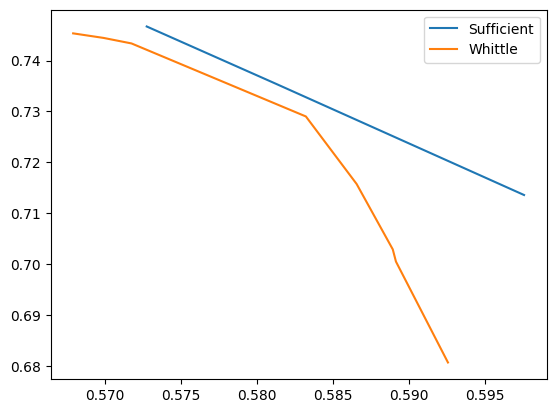

In [41]:
if is_jupyter:
    sufficient_x, sufficient_y = zip(*filter_pareto_optimal(list(sorted(zip(sufficient_active,sufficient_match),key=lambda k: k[0]))))
    approximate_x, approximate_y = zip(*filter_pareto_optimal(list(sorted(zip(approximate_active,approximate_match),key=lambda k: k[0]))))
    # plt.plot(joint_active,joint_match,label='Q Iteration')
    plt.plot(sufficient_x,sufficient_y,label='Sufficient')
    plt.plot(approximate_x,approximate_y,label='Whittle')
    plt.legend()
    plt.show()

In [ ]:
save_path = get_save_path('combined',save_name,seed,use_date=save_with_date)

In [ ]:
delete_duplicate_results('combined',save_name,data)

In [ ]:
json.dump(data,open('../results/'+save_path,'w'))